### Importing Necessary Libraries

In [1]:
pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.3 MB/s eta 0:00:00


In [2]:
pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=c10081e09db62fba48d399e339ebee001f7794083d10a53905fd9e230a3e0bc7
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [3]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import random
from transformers import pipeline, set_seed
from datasets import load_dataset, load_from_disk
import matplotlib.pyplot as plt
from datasets import load_dataset
import pandas as pd
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer,Seq2SeqTrainingArguments,Seq2SeqTrainer
from transformers import DataCollatorForSeq2Seq
import nltk
from nltk.tokenize import sent_tokenize
from tqdm import tqdm
import torch
nltk.download("punkt")
from rouge_score import rouge_scorer

from transformers import DataCollatorForSeq2Seq
from transformers import TrainingArguments, Trainer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 29.3 MB/s eta 0:00:00


In [5]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.9 MB/s eta 0:00:00


### Loading Data

In [6]:
samsum = load_dataset("samsum")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


samsum.py:   0%|          | 0.00/3.36k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

The repository for samsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/samsum.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


corpus.7z:   0%|          | 0.00/2.94M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

In [7]:
samsum

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [8]:
train_data = pd.DataFrame(samsum['train'])
test_data = pd.DataFrame(samsum['test'])
val_data = pd.DataFrame(samsum['validation'])
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14732 entries, 0 to 14731
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        14732 non-null  object
 1   dialogue  14732 non-null  object
 2   summary   14732 non-null  object
dtypes: object(3)
memory usage: 345.4+ KB
None


In [9]:
train_data

,id,dialogue,summary
0,13818513,Amanda: I baked cookies. Do you want some?\r\...,Amanda baked cookies and will bring Jerry some...
1,13728867,Olivia: Who are you voting for in this electio...,Olivia and Olivier are voting for liberals in ...
2,13681000,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...",Kim may try the pomodoro technique recommended...
3,13730747,"Edward: Rachel, I think I'm in ove with Bella....",Edward thinks he is in love with Bella. Rachel...
4,13728094,Sam: hey overheard rick say something\r\nSam:...,"Sam is confused, because he overheard Rick com..."
...,...,...,...
14727,13863028,Romeo: You are on my ‘People you may know’ lis...,Romeo is trying to get Greta to add him to her...
14728,13828570,Theresa: <file_photo>\r\nTheresa: <file_photo>...,Theresa is at work. She gets free food and fre...
14729,13819050,John: Every day some bad news. Japan will hunt...,Japan is going to hunt whales again. Island an...
14730,13828395,Jennifer: Dear Celia! How are you doing?\r\nJe...,Celia couldn't make it to the afternoon with t...


In [10]:
# Display descriptive statistics
train_data.describe()

,id,dialogue,summary
count,14732,14732,14732
unique,14732,14265,14730
top,13818513,"Jimmy: Hey, guess what? My car's completely ka...",Seth's pet Oreo that he got when he was 10 is ...
freq,1,4,2


## Part 2 : Exploratory Data Analysis

#### Length distribution of dialogues and summaries in the training set
Number of words in each summary

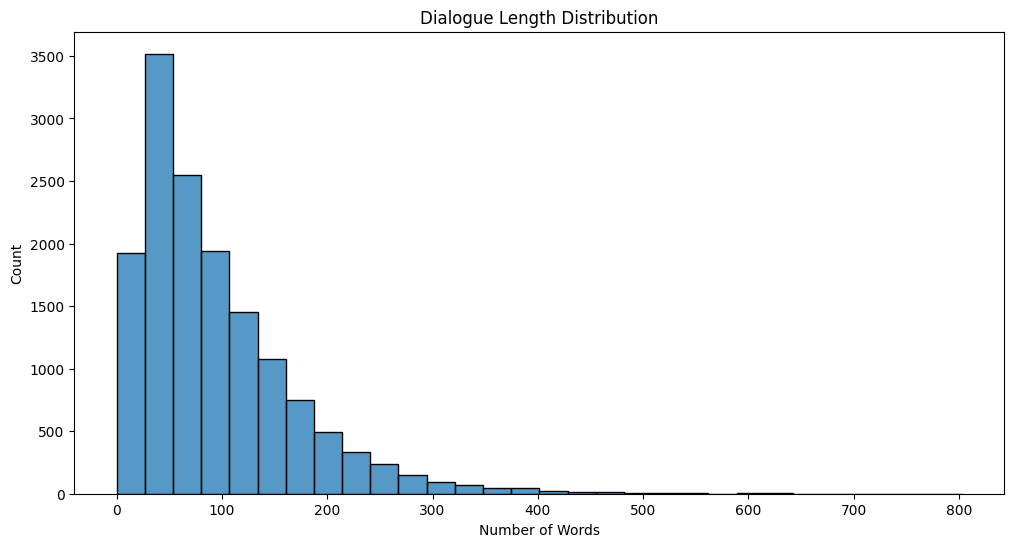

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(train_data['dialogue'].str.split().map(lambda x: len(x)), bins=30)
plt.title('Dialogue Length Distribution')
plt.xlabel('Number of Words')
plt.show()

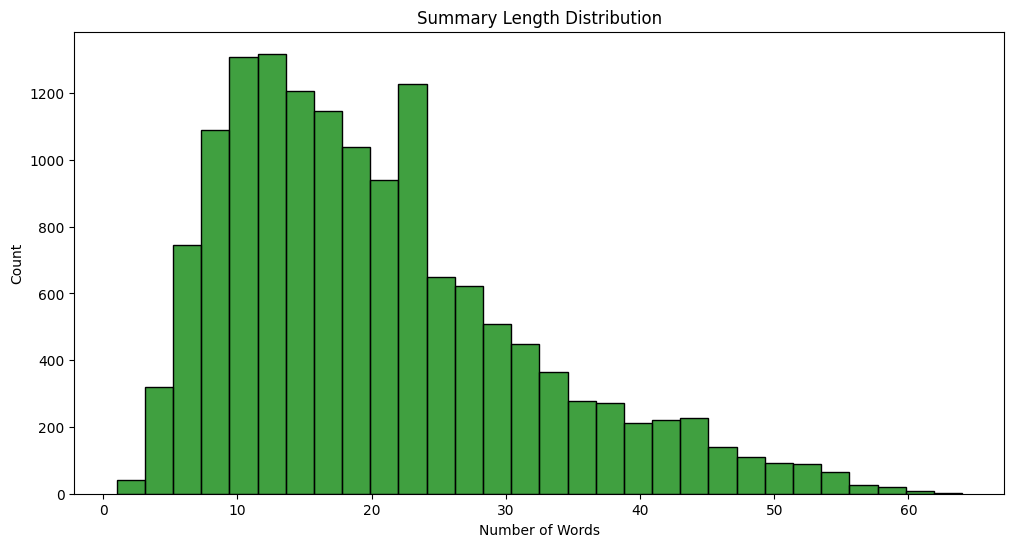

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(train_data['summary'].str.split().map(lambda x: len(x)), bins=30,color='green')
plt.title('Summary Length Distribution')
plt.xlabel('Number of Words')
plt.show()

##### Number of Characters in each summary and dialogue

<Axes: >

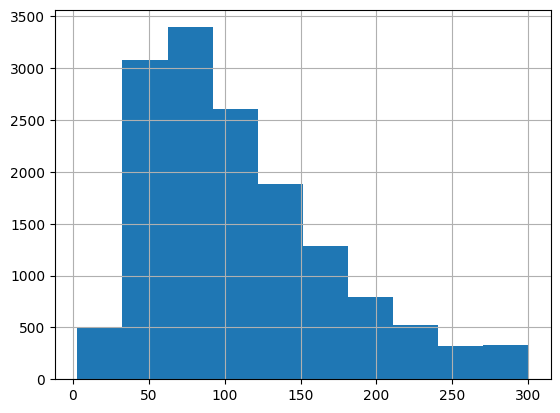

In [ ]:
train_data['summary'].str.len().hist()

<Axes: >

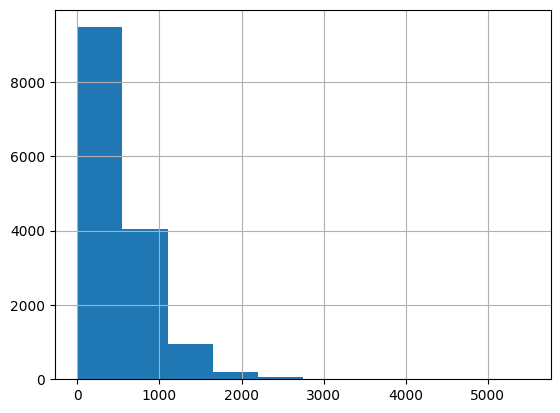

In [ ]:
train_data['dialogue'].str.len().hist()

#### Display the 20 most common words in the dialogues and their frequencies

In [23]:
def clean_data(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic chars
    words = text.lower().split()  # Convert to lowercase and split
    return words

In [24]:
all_words = [word for dialogue in train_data['dialogue'] for word in clean_data(dialogue)]

In [25]:
# Get the 20 most common words
common_words = Counter(all_words).most_common(20)

('i', 'you', 'the', 'to', 'a', 'it', 'and', 'for', 'in', 'is', 'that', 'have', 'of', 'so', 'but', 'me', 'im', 'be', 'what', 'we')
(44151, 39082, 31569, 29204, 22279, 20404, 17728, 11987, 11563, 11339, 10885, 10781, 10770, 10481, 10197, 10190, 9497, 9174, 8676, 8652)


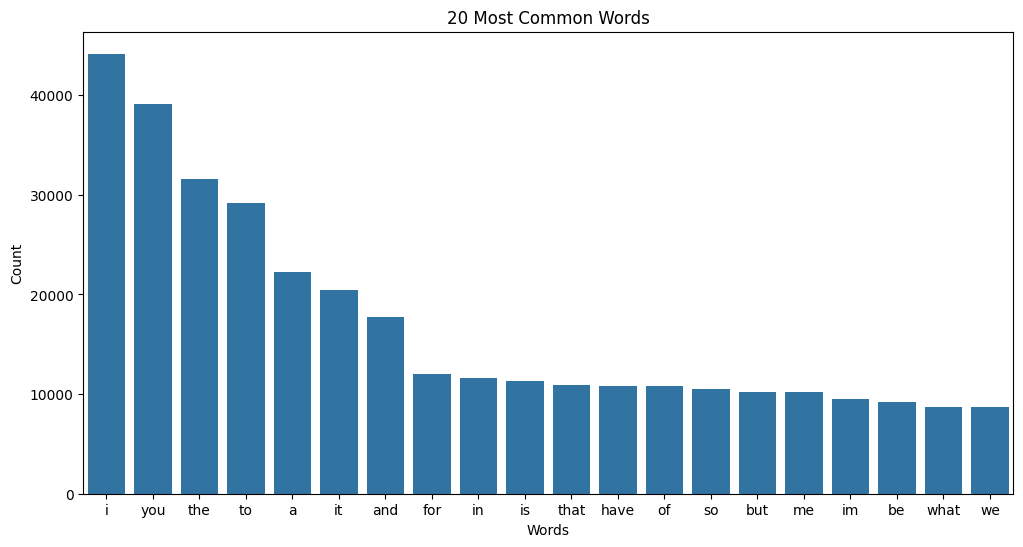

In [28]:
# Plotting the 20 most common words

words, freqs = zip(*common_words)
print(words)
print(freqs)
x= list(words)
y=list(freqs)
plt.figure(figsize=(12, 6))
sns.barplot(x=x, y=y)
plt.title('20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

#### Analysis:
As we can observer the most common 20 words are usually stop words as it should be in normal coversation dialogue like we will have stop words so now we will update clean_data function to remove stop words and check top 20 words again.

In [29]:
# Load English stopwords
stop_words = set(stopwords.words('english'))
def clean_data(text):
    text = re.sub(r'[^a-zA-Z\s]+', '', text)  # Removing non-alphabetic chars
    words = text.lower().split()  # Converting to lowercase
    return [word for word in words if word not in stop_words]  # Remove stop words and return clean data

('im', 'know', 'dont', 'ok', 'like', 'ill', 'good', 'think', 'well', 'see', 'yeah', 'yes', 'time', 'sure', 'one', 'go', 'really', 'get', 'thats', 'need')
(9497, 7568, 6843, 6261, 5700, 4886, 4654, 4413, 4333, 4312, 4303, 4217, 4125, 4030, 3891, 3875, 3764, 3728, 3512, 3175)


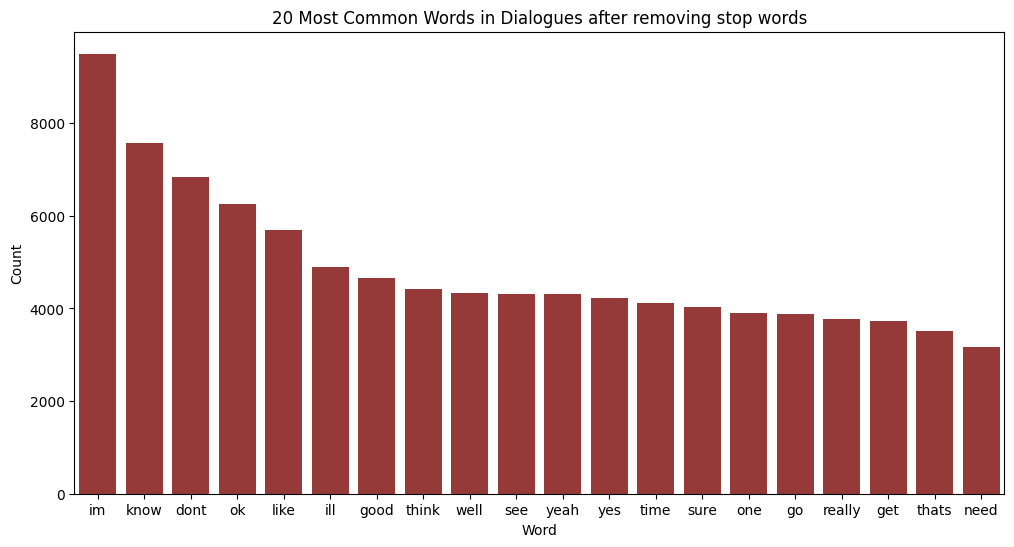

In [33]:
all_words = [word for dialogue in train_data['dialogue'] for word in clean_data(dialogue)]
common_words = Counter(all_words).most_common(20)
words, freqs = zip(*common_words)
print(words)
print(freqs)
x= list(words)
y=list(freqs)
plt.figure(figsize=(12, 6))
sns.barplot(x=x, y=y,color='brown')
plt.title('20 Most Common Words in Dialogues after removing stop words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

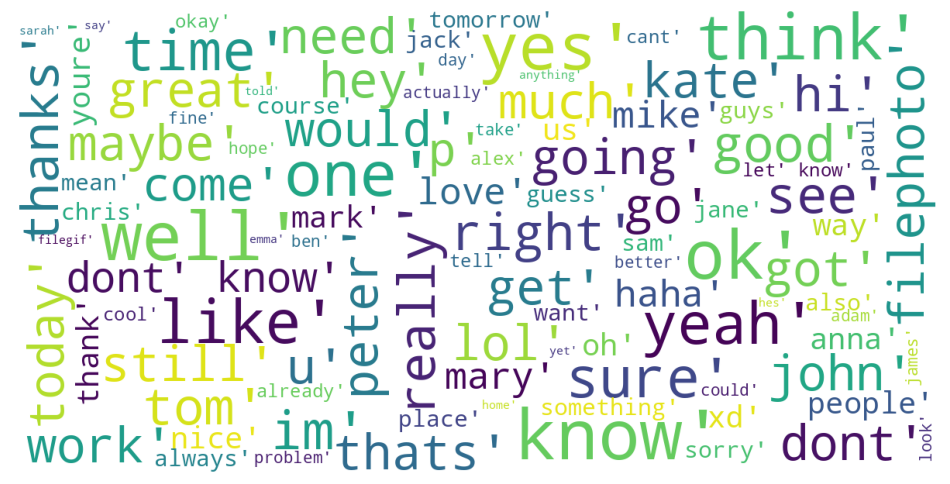

In [41]:
# We will also plot word cloud which will give an idea into more common words rather than just looking into top 20 words

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

wordcloud=wordcloud.generate(str(all_words))

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(wordcloud)
plt.show()


### Word Cloud Analysis
- We can observe top 100 words mainly they have some common names like Kate and mike, peter.
- Also, some daily usage words like yeah, sure, know etc.

## Part 3: Inference with Pre-trained Models

In [42]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [43]:
# Load the summarization pipelines, we will choose following three models for our task : bart, T5 Small and Peagasus

t5_summarizer = pipeline("summarization", model="t5-small",device=device)
pegasus_summarizer = pipeline("summarization", model="google/pegasus-xsum",device=device)
bart_summarizer = pipeline("summarization", model="facebook/bart-large-cnn",device=device)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [44]:
# generate summaries using given text and summarizer
def get_summaries(text,summarizer):
    summary = summarizer(text, max_length=30, min_length=30, do_sample=False)[0]['summary_text']
    return summary

In [45]:
num_samples = 3
random_indices = random.sample(range(len(samsum['train'])), num_samples) # will generate random indices from samsum['train] dataset.

In [47]:
'''
Loop in the random indices , fetch dialogue and summary then loop through all models and generate summaries.
'''

for idx in random_indices:
    dialogue = samsum['train'][idx]['dialogue']
    summary = samsum['train'][idx]['summary']

    print(f"Dialogue {idx}:")
    print(dialogue)
    print("\ Summary:")
    print(summary)
    model_list=['bart','t5','pegasus']
    for model in model_list:
        if model=='bart':
            model_name=bart_summarizer
        elif model=='t5':
            model_name=t5_summarizer
        else:
            model_name=pegasus_summarizer
        generated_summary = get_summaries(dialogue,model_name)
        print(f"\n{model} Summary:")
        print(generated_summary)
        print("\n" + "*"*100 + "\n")

Dialogue 5768:
Robert: Hi, Jane. What's up?
Jane: Nothing much. How about you?
Robert: Just browsing the internet for some interesting movie.
Jane: You want to watch it online?
Robert: Not necessarily. Frankly, I'd rather go out.
Jane: It's pouring.
Robert: I got a car and umbrella.
Jane: Sounds like you might stay dry:)
Robert: Want to try to stay dry with me.
Jane: Why not. Pick me up.
\ Summary:
Robert is picking Jane up and they are going out even though it's raining heavily. 

bart Summary:
Robert and Jane are watching a movie on the internet. It's pouring and they want to go out. Robert offers to pick them up

****************************************************************************************************


t5 Summary:
Robert: You want to watch it online? Robert: I got a car and umbrella . Robert: Sounds like you might stay dry with

****************************************************************************************************


pegasus Summary:
Jane: Hi, I'm Jane, and 

Your max_length is set to 30, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)



bart Summary:
Mike: the meeting is at 10 am, so dont be late for it. Harvey: ok, thanks for the update. Mike:

****************************************************************************************************



Your max_length is set to 30, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)



t5 Summary:
the meeting is at 10 am, so dont be late Harvey: ok, thanks for the update . the meeting was at 10am,

****************************************************************************************************


pegasus Summary:
BBC News NI's Mike Bushell is on the phone to BBC News NI's chief political correspondent, Harvey Jones, ahead of the

****************************************************************************************************

Dialogue 2068:
Sarah: did you see the chase last night
Larry: I love the chase
Sarah: Bradley Walsh I love him 💖 he is so funny
Larry: he is proper talented you know
Sarah: yes wasn't he in Coronation Street once?
Larry: yes that was ages ago he owned the knicker factory
Sarah: did he have an affair with Deirdre Barlow?
Larry: lol no... that was Mike Baldwin
Sarah: oh yeah lol
Larry: no he was with the comedienne damn I cant remember her name
Sarah: that will drive you mad now all night
Larry: I bloody know it will
Sarah: hes a good sing

### Coherence Analysis:

1. Dialogue 5768-
  - Bart Model- Partially accurate. But it misrepresents the conversation and deduced that they are watching a movie online, which is not the main focus. But also captures the information.
  - T5 Model - Not coherent. The quotes are out of context, and it doesn’t summarize the conversation effectively.
  - Pegasus Model - Not at all coherent and some random words this model have picked and provided summary.

2. Dialouge 10967-
  - Bart Model- Coherent captures relevant information but kind of gave same sentences from dialouge rathen than giving summary.
  - T5 Model - Partially coherent. But at the end it gave incorrect information also.
  - Pegasus Model - Incoherent and unrelated to the dialogue.

2. Dialouge 2068-
  - Bart Model- Incomplete and lacks context. It doesn’t summarize the conversation effectively.
  - T5 Model - Out of context
  - Pegasus Model - captures some of the discussion, but it lacks specific details better than Bart and T5 for this dialouge.

### Do they capture essential points:

- For all models they were able to capture some points but usually lacks in getting specific details.
- Also, varies for each dialouge like for one Bart model perfomed better for one Pegasus performed better.
- So we can try fine tuning on samsum data and then observe if model improves to capture more information and provide better sumamary.

## Part 4: Define a Baseline

In [48]:
def lead_3_baseline(text):
    '''
    Will accept the text and return the first 3 sentences as the summary
    '''
    sentences = sent_tokenize(text)  # Split text into sentences
    return " ".join(sentences[:3])

In [49]:
def calculate_rouge_scores(predicted_summary, reference_summary):
    # Caluclate Rouge score between predicted and refernce summary
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_scores = scorer.score(reference_summary, predicted_summary)
    return rouge_scores

In [54]:
results = [] # We will store the generated sample and their rouge score so that we can compare them later.
for idx in random_indices:
    dialogue = samsum['train'][idx]['dialogue']
    summary = samsum['train'][idx]['summary']

    print("Reference Summary:")
    print(summary)
    model_list=['bart','t5','pegasus','lead_3_baseline']
    for model in model_list:
        # define correct model_name for each model type and generate summary
        if model=='bart':
            model_name=bart_summarizer
            generated_summary = get_summaries(dialogue,model_name)
        elif model=='t5':
            model_name=t5_summarizer
            generated_summary = get_summaries(dialogue,model_name)
        elif model=='pegasus':
            model_name=pegasus_summarizer
            generated_summary = get_summaries(dialogue,model_name)
        elif model=='lead_3_baseline':
            generated_summary=lead_3_baseline(dialogue)

        # Calculating rouge scores with generated summary and summary captured from the samsum datset
        rouge_scores = calculate_rouge_scores(generated_summary, summary)
        print(f"\n{model} Summary:")
        print(generated_summary)
        print(f"Rouge Scores: {rouge_scores}")
        print("\n" + "*"*130 + "\n")

        results.append({
            'Dialogue Index': idx,
            'Model_Name': model,
            'Generated_Summary': generated_summary,
            'Reference_Summary': summary,
            'ROUGE-1': rouge_scores['rouge1'].fmeasure,
            'ROUGE-2': rouge_scores['rouge2'].fmeasure,
            'ROUGE-L': rouge_scores['rougeL'].fmeasure
        })

model_comparison_df = pd.DataFrame(results)

Reference Summary:
Robert is picking Jane up and they are going out even though it's raining heavily. 

bart Summary:
Robert and Jane are watching a movie on the internet. It's pouring and they want to go out. Robert offers to pick them up
Rouge Scores: {'rouge1': Score(precision=0.44, recall=0.6875, fmeasure=0.5365853658536586), 'rouge2': Score(precision=0.125, recall=0.2, fmeasure=0.15384615384615385), 'rougeL': Score(precision=0.24, recall=0.375, fmeasure=0.2926829268292683)}

**********************************************************************************************************************************


t5 Summary:
Robert: You want to watch it online? Robert: I got a car and umbrella . Robert: Sounds like you might stay dry with
Rouge Scores: {'rouge1': Score(precision=0.13636363636363635, recall=0.1875, fmeasure=0.15789473684210525), 'rouge2': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rougeL': Score(precision=0.09090909090909091, recall=0.125, fmeasure=0.1052631578947368

Your max_length is set to 30, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)



bart Summary:
Mike: the meeting is at 10 am, so dont be late for it. Harvey: ok, thanks for the update. Mike:
Rouge Scores: {'rouge1': Score(precision=0.3, recall=1.0, fmeasure=0.4615384615384615), 'rouge2': Score(precision=0.2631578947368421, recall=1.0, fmeasure=0.4166666666666667), 'rougeL': Score(precision=0.3, recall=1.0, fmeasure=0.4615384615384615)}

**********************************************************************************************************************************



Your max_length is set to 30, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)



t5 Summary:
the meeting is at 10 am, so dont be late Harvey: ok, thanks for the update . the meeting was at 10am,
Rouge Scores: {'rouge1': Score(precision=0.2857142857142857, recall=1.0, fmeasure=0.4444444444444445), 'rouge2': Score(precision=0.25, recall=1.0, fmeasure=0.4), 'rougeL': Score(precision=0.2857142857142857, recall=1.0, fmeasure=0.4444444444444445)}

**********************************************************************************************************************************


pegasus Summary:
BBC News NI's Mike Bushell is on the phone to BBC News NI's chief political correspondent, Harvey Jones, ahead of the
Rouge Scores: {'rouge1': Score(precision=0.08695652173913043, recall=0.3333333333333333, fmeasure=0.13793103448275862), 'rouge2': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rougeL': Score(precision=0.043478260869565216, recall=0.16666666666666666, fmeasure=0.06896551724137931)}

********************************************************************************

In [55]:
model_comparison_df

,Dialogue Index,Model_Name,Generated_Summary,Reference_Summary,ROUGE-1,ROUGE-2,ROUGE-L
0,5768,bart,Robert and Jane are watching a movie on the in...,Robert is picking Jane up and they are going o...,0.536585,0.153846,0.292683
1,5768,t5,Robert: You want to watch it online? Robert: I...,Robert is picking Jane up and they are going o...,0.157895,0.000000,0.105263
2,5768,pegasus,"Jane: Hi, I'm Jane, and I'm here with my frien...",Robert is picking Jane up and they are going o...,0.222222,0.000000,0.166667
3,5768,lead_3_baseline,"Robert: Hi, Jane. What's up? Jane: Nothing much.",Robert is picking Jane up and they are going o...,0.320000,0.000000,0.240000
4,10967,bart,"Mike: the meeting is at 10 am, so dont be late...",The meeting is at 10 am.,0.461538,0.416667,0.461538
5,10967,t5,"the meeting is at 10 am, so dont be late Harve...",The meeting is at 10 am.,0.444444,0.400000,0.444444
6,10967,pegasus,BBC News NI's Mike Bushell is on the phone to ...,The meeting is at 10 am.,0.137931,0.000000,0.068966
7,10967,lead_3_baseline,Mike: morning\r\nMike: the meeting is at 10 am...,The meeting is at 10 am.,0.480000,0.434783,0.480000
8,2068,bart,Bradley Walsh was in Coronation Street once. H...,"Sarah and Larry like to watch ""The Chase"". The...",0.268657,0.123077,0.238806
9,2068,t5,Larry: yes that was ages ago he owned the knic...,"Sarah and Larry like to watch ""The Chase"". The...",0.147059,0.000000,0.088235


### Evaulate model rouge score
1. Dialogue 5768-
 We can observe lead_3_baseline perfomed better than t5 and pegasus but Bart was best among all the models.

2. Dialouge 10967-
  lead_3_baseline was very concise and accurate and that is relfected in rouge score also. Comparing with other models Bart and t5 performed almost similar but pegasus was not that good.

2. Dialouge 2068-
 For this pegasus perfomed best , although lead_3_baseline was better than t5 here also.


## Part 5: Fine-Tuning

I will fine tune on t5-small model as it strike a good balance between performance, resource usage, and fine-tuning efficiency.

In [56]:
model_checkpoint = 't5-small'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [58]:
prefix = 'summarize:'
max_dialogue_length = 1024
max_summary_length = 128

In [59]:
def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["dialogue"]]
    model_inputs = tokenizer(inputs, max_length=max_dialogue_length, truncation=True)

    labels = tokenizer(text_target=examples["summary"], max_length=max_summary_length, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [60]:
final_data = samsum.map(preprocess_function, batched =True,
                     remove_columns=['id', 'dialogue', 'summary'])

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [61]:
samsum,final_data

(DatasetDict({
     train: Dataset({
         features: ['id', 'dialogue', 'summary'],
         num_rows: 14732
     })
     test: Dataset({
         features: ['id', 'dialogue', 'summary'],
         num_rows: 819
     })
     validation: Dataset({
         features: ['id', 'dialogue', 'summary'],
         num_rows: 818
     })
 }),
 DatasetDict({
     train: Dataset({
         features: ['input_ids', 'attention_mask', 'labels'],
         num_rows: 14732
     })
     test: Dataset({
         features: ['input_ids', 'attention_mask', 'labels'],
         num_rows: 819
     })
     validation: Dataset({
         features: ['input_ids', 'attention_mask', 'labels'],
         num_rows: 818
     })
 }))

In [62]:
model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

In [65]:
pip install huggingface_hub

In [1]:
# Login into hugging face so that we can save trained model and can refer it later
from huggingface_hub import notebook_login

notebook_login()

### Model Training

In [80]:
batch_size = 4
epochs = 4
model_name = f"{model_checkpoint}-transcript-summarizer"
args = Seq2SeqTrainingArguments(
    model_name,                                                        # Specify Model name
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,                                                # Save the model only 3 times
    num_train_epochs=epochs,                                           # Number of Epochs
    predict_with_generate=True,                                        # To predict Sequences
    fp16=True,                                                         # Set to fp16, mixed precision training
    push_to_hub=True                                                  # Push model to huggingface
)

model.save_pretrained(model_name)

In [81]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [82]:
from evaluate import load

metric = load("rouge")
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]

    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    result = {key : value * 100 for key, value in result.items()}

    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v,4) for k,v in result.items()}


In [83]:
trainer  = Seq2SeqTrainer(model,
                         args,
                         train_dataset=final_data['train'],
                         eval_dataset=final_data['validation'],
                         tokenizer= tokenizer,
                         data_collator=data_collator,
                         compute_metrics= compute_metrics
                         )

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


In [84]:
trainer.train()

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,1.969100,1.786373,40.939100,18.233900,34.477300,38.077700,16.701700
2,1.921300,1.753279,41.465800,18.808600,34.894700,38.352800,16.520800


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,1.969100,1.786373,40.939100,18.233900,34.477300,38.077700,16.701700
2,1.921300,1.753279,41.465800,18.808600,34.894700,38.352800,16.520800
3,1.875700,1.736699,41.641000,18.735500,35.043200,38.540300,16.544000
4,1.848400,1.734725,41.499300,18.676800,34.890100,38.434000,16.533000


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


TrainOutput(global_step=14732, training_loss=1.9168887173323537, metrics={'train_runtime': 2392.219, 'train_samples_per_second': 24.633, 'train_steps_per_second': 6.158, 'total_flos': 4268572567928832.0, 'train_loss': 1.9168887173323537, 'epoch': 4.0})

In [85]:
 trainer.push_to_hub() # pushing model to hugging face

events.out.tfevents.1729542493.1182f181c872.1238.1:   0%|          | 0.00/14.5k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/ShikhaTiwari/t5-small-transcript-summarizer/commit/638b786b8ad5f119468d47d3e3bb5d8e7e7af401', commit_message='End of training', commit_description='', oid='638b786b8ad5f119468d47d3e3bb5d8e7e7af401', pr_url=None, pr_revision=None, pr_num=None)

In [86]:
test_evaluation_results = trainer.evaluate(final_data['test'])

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [87]:
test_evaluation_results

{'eval_loss': 1.7506688833236694,
 'eval_rouge1': 41.2217,
 'eval_rouge2': 18.0151,
 'eval_rougeL': 34.2328,
 'eval_rougeLsum': 37.8944,
 'eval_gen_len': 16.7778,
 'eval_runtime': 101.2614,
 'eval_samples_per_second': 8.088,
 'eval_steps_per_second': 2.024,
 'epoch': 4.0}

## Test set analysis

- eval_loss: 1.7507, we have  lower loss indicating that the model's predictions are close to the expected outputs.
- eval_rouge1: 41.22
ROUGE-1 measures the overlap of unigrams (individual words) between the generated and reference summaries. This score suggests a 41.22% unigram overlap, which indicates a good performance.
- eval_rouge2: 18.02
ROUGE-2 measures the overlap of bigrams. An 18.02% bigram overlap is decent, so model was able to capture some information but not that much.
eval_rougeL: 34.23
- ROUGE-L focuses on the longest common subsequence (LCS), which is again decent.
eval_rougeLsum: 37.89
- ROUGE-Lsum is similar to ROUGE-L but specialized for summarization, accounting for multiple sentences. A 37.89% overlap indicates effective summarization.

In [88]:
summarizer = pipeline('summarization', model = model, tokenizer = tokenizer,device=device)

In [99]:
for idx in random_indices:
    dialogue = samsum['train'][idx]['dialogue']
    summary = samsum['train'][idx]['summary']

    print(f"Dialogue {idx}:")
    print(dialogue)
    print("\ Summary:")
    print(summary)
    generated_summary = summarizer(dialogue)
    print("Generated Summary:")
    print(generated_summary)
    print("\n" + "*"*100 + "\n")


Your max_length is set to 200, but your input_length is only 106. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=53)


Dialogue 5768:
Robert: Hi, Jane. What's up?
Jane: Nothing much. How about you?
Robert: Just browsing the internet for some interesting movie.
Jane: You want to watch it online?
Robert: Not necessarily. Frankly, I'd rather go out.
Jane: It's pouring.
Robert: I got a car and umbrella.
Jane: Sounds like you might stay dry:)
Robert: Want to try to stay dry with me.
Jane: Why not. Pick me up.
\ Summary:
Robert is picking Jane up and they are going out even though it's raining heavily. 


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


Generated Summary:
[{'summary_text': 'Robert is browsing the internet for a movie. Jane wants to watch it online. Robert got a car and a umbrella. Jane is going to pick Robert up.'}]

****************************************************************************************************

Dialogue 10967:
Mike: morning
Mike: the meeting is at 10 am, so dont be late
Harvey: ok, thanks for the update
\ Summary:
The meeting is at 10 am.
Generated Summary:
[{'summary_text': "The meeting is at 10 am. Harvey will update Mike's update on the meeting at Harvey's request. The meeting will be at 10 pm."}]

****************************************************************************************************

Dialogue 2068:
Sarah: did you see the chase last night
Larry: I love the chase
Sarah: Bradley Walsh I love him 💖 he is so funny
Larry: he is proper talented you know
Sarah: yes wasn't he in Coronation Street once?
Larry: yes that was ages ago he owned the knicker factory
Sarah: did he have an affai

### Analysis on some test dialouges:
1. Dialogue 5768-
It picked some keywords but summary is not good and coherent and also we can observe that it misintepreted like Jane picking Robert but it was opposite.

2. Dialouge 10967-
  It captures information well, but also added some extra details like Harvey updating on Mike's behalf which is not true.

2. Dialouge 2068-
Partially correct but also some wrong information like the "Chase" aired on Coronation Street and suggests incorrect relationships (Bradley Walsh's affair with Deirdre).




In [95]:
# saving model to local space
model.save_pretrained("./saved_model")
tokenizer.save_pretrained("./saved_model")

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 200, 'min_length': 30, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3}


('./saved_model/tokenizer_config.json',
 './saved_model/special_tokens_map.json',
 './saved_model/spiece.model',
 './saved_model/added_tokens.json',
 './saved_model/tokenizer.json')

In [98]:
# Load the trained model and tokenizer
model_checkpoint = "./saved_model"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model1 = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

def generate_summary(dialogue):
    inputs = tokenizer.encode("summarize: " + dialogue, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model1.generate(inputs, max_length=128, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [100]:
results = []
for idx in random_indices:
    dialogue = samsum['train'][idx]['dialogue']
    summary = samsum['train'][idx]['summary']

    print(f"Dialogue {idx}:")
    print(dialogue)
    print("Summary:")
    print(summary)
    generated_summary = generate_summary(dialogue)
    rouge_scores = calculate_rouge_scores(generated_summary, summary)
    print("Generated Summary:")
    print(generated_summary)
    print(f"Rouge Scores: {rouge_scores}")
    print("\n" + "*"*130 + "\n")
    results.append({
            'Dialogue Index': idx,
            'Model_Name': "Fine Tuned T5 Small",
            'Generated_Summary': generated_summary,
            'Reference_Summary': summary,
            'ROUGE-1': rouge_scores['rouge1'].fmeasure,
            'ROUGE-2': rouge_scores['rouge2'].fmeasure,
            'ROUGE-L': rouge_scores['rougeL'].fmeasure
        })

Dialogue 5768:
Robert: Hi, Jane. What's up?
Jane: Nothing much. How about you?
Robert: Just browsing the internet for some interesting movie.
Jane: You want to watch it online?
Robert: Not necessarily. Frankly, I'd rather go out.
Jane: It's pouring.
Robert: I got a car and umbrella.
Jane: Sounds like you might stay dry:)
Robert: Want to try to stay dry with me.
Jane: Why not. Pick me up.
Summary:
Robert is picking Jane up and they are going out even though it's raining heavily. 
Generated Summary:
Robert is browsing the internet for a movie. Jane wants to watch it online. Robert got a car and a umbrella. Jane is going to pick Robert up.
Rouge Scores: {'rouge1': Score(precision=0.2857142857142857, recall=0.5, fmeasure=0.36363636363636365), 'rouge2': Score(precision=0.037037037037037035, recall=0.06666666666666667, fmeasure=0.047619047619047616), 'rougeL': Score(precision=0.17857142857142858, recall=0.3125, fmeasure=0.22727272727272727)}

*************************************************

In [103]:
fine_tuned_T5_small = pd.DataFrame(results)

In [104]:
fine_tuned_T5_small

,Dialogue Index,Model_Name,Generated_Summary,Reference_Summary,ROUGE-1,ROUGE-2,ROUGE-L
0,5768,Fine Tuned T5 Small,Robert is browsing the internet for a movie. J...,Robert is picking Jane up and they are going o...,0.363636,0.047619,0.227273
1,10967,Fine Tuned T5 Small,The meeting is at 10 am. Harvey will update Mi...,The meeting is at 10 am.,0.375000,0.333333,0.375000
2,2068,Fine Tuned T5 Small,Larry and Sarah will watch the chase on Corona...,"Sarah and Larry like to watch ""The Chase"". The...",0.363636,0.162791,0.204545


In [105]:
all_model_comparison = pd.concat([model_comparison_df, fine_tuned_T5_small], ignore_index=True)

In [111]:
all_model_comparison[['Dialogue Index','Model_Name','ROUGE-1','ROUGE-2','ROUGE-L']].sort_values(by='Model_Name')

,Dialogue Index,Model_Name,ROUGE-1,ROUGE-2,ROUGE-L
12,5768,Fine Tuned T5 Small,0.363636,0.047619,0.227273
13,10967,Fine Tuned T5 Small,0.375000,0.333333,0.375000
14,2068,Fine Tuned T5 Small,0.363636,0.162791,0.204545
0,5768,bart,0.536585,0.153846,0.292683
4,10967,bart,0.461538,0.416667,0.461538
8,2068,bart,0.268657,0.123077,0.238806
3,5768,lead_3_baseline,0.320000,0.000000,0.240000
7,10967,lead_3_baseline,0.480000,0.434783,0.480000
11,2068,lead_3_baseline,0.229167,0.052632,0.166667
2,5768,pegasus,0.222222,0.000000,0.166667


### Comparing T5 model before and after fine tuning-
- Fine-tuned T5 Small performs better than the original T5 on dialogues with complex structures (5768, 2068)
- The original T5 is slightly better for shorter dialogues with simple summaries (10967) as fine tuned model gave extra information which was not even part of dialogue.
- Overall, we can see fine-tuned model is more suitable for complex, multi-turn dialogues and while comparing rouge scores we can observe there is a significant improvement in rouge scoresspecially fro dialogue 5768 and 2068.